<a href="https://colab.research.google.com/github/hykim-1/Study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%9E%91%EB%AC%BC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

csv_path = "/content/drive/MyDrive/Crop_recommendation.csv"
df = pd.read_csv(csv_path)

print(df.shape)
df

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


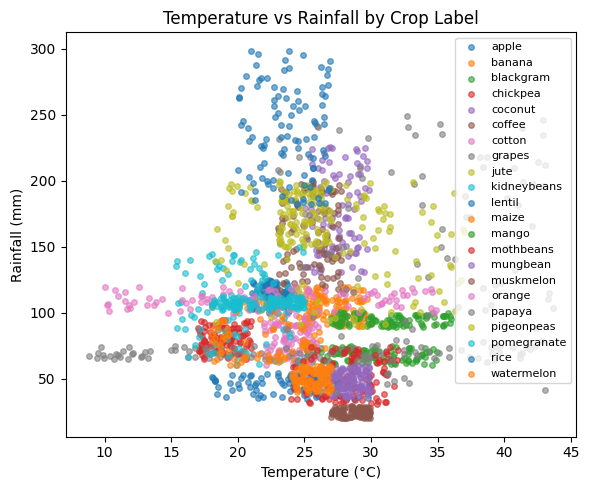

In [5]:
# 결측치 제거
sub = df[['temperature', 'rainfall', 'label']].dropna()
plt.figure(figsize=(6,5))

for name, part in sub.groupby('label'):
    plt.scatter(part['temperature'], part['rainfall'], alpha=0.6, label=name, s=16)

plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.title("Temperature vs Rainfall by Crop Label")
plt.legend(loc='best', fontsize=8, markerscale=1)
plt.tight_layout()
plt.show()


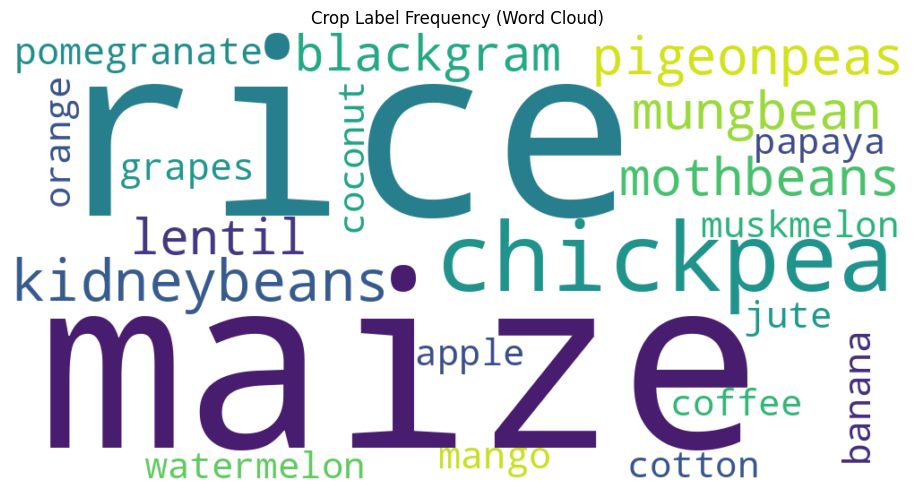

In [6]:
# label 빈도 → 워드클라우드
freq = df['label'].value_counts().to_dict()

wc = WordCloud(
    width=1000,
    height=500,
    background_color="white"
).generate_from_frequencies(freq)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Crop Label Frequency (Word Cloud)")
plt.tight_layout()
plt.show()
